I have to get to the data before work on it. Without donwloading directly, I want to reach the data from github through colab.

In [ ]:
import pandas as pd
url = 'https://github.com/tarikkranda/pi_intern_question/blob/main/dataset.csv'
html = pd.read_html(url, header = 0)
df = html[0]

General look at the data

In [ ]:
df.head(200)

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,isVirus
0,NaN,-0.233467,0.308799,2.484015,1.732721,False
1,NaN,1.519003,1.238482,3.344450,0.783744,False
2,NaN,0.400640,1.916748,3.291096,-0.918519,False
3,NaN,-1.616474,0.209703,1.461544,-0.291837,False
4,NaN,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...,...
195,NaN,1.149379,0.037458,2.031128,0.297514,True
196,NaN,-0.165629,1.741682,3.234103,NaN,True
197,NaN,-0.446836,0.861938,2.583093,-0.183756,True
198,NaN,0.544355,1.497471,1.613069,0.649211,True


Checking how much NaN values our dataset has.

In [ ]:
df.isna().sum()

Unnamed: 0    1999
feature_1      102
feature_2      100
feature_3      106
feature_4      102
isVirus          0
dtype: int64

I want to begin cleaning from column that has no values except NaN.

In [ ]:
df = df.dropna(axis='columns', how='all')
df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False
1995,NaN,3.562990,NaN,2.499590,False
1996,4.059027,1.977436,2.144760,4.257220,False
1997,3.457310,3.962342,3.770837,3.243168,False


After that I noticed we have NaN values that sneak inside our 'feature' columns. I decided to fill them with 0.

In [ ]:
df = df.fillna(0)
df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False
1995,0.000000,3.562990,0.000000,2.499590,False
1996,4.059027,1.977436,2.144760,4.257220,False
1997,3.457310,3.962342,3.770837,3.243168,False


Checking how much NaN values our dataset has after cleaning it.

In [ ]:
df.isna().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64

Editing isVirus column in accordance with your request.

In [ ]:
df['isVirus'] = df['isVirus'].replace({True: 'Virus', False: 'Not a Virus'})
df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,Not a Virus
1,1.519003,1.238482,3.344450,0.783744,Not a Virus
2,0.400640,1.916748,3.291096,-0.918519,Not a Virus
3,-1.616474,0.209703,1.461544,-0.291837,Not a Virus
4,1.480515,5.299829,2.640670,1.867559,Virus
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,Not a Virus
1995,0.000000,3.562990,0.000000,2.499590,Not a Virus
1996,4.059027,1.977436,2.144760,4.257220,Not a Virus
1997,3.457310,3.962342,3.770837,3.243168,Not a Virus


Importing important libraries for visualizing.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

My first visualization is about comparing the amount of viruses and Not a Viruses

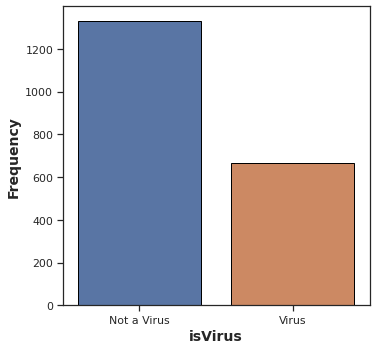

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='isVirus', data=df, edgecolor='black')

plt.xlabel('isVirus', fontsize=14, fontweight='bold')
plt.ylabel('Amount', fontsize=14, fontweight='bold')

plt.savefig('plot_isVirus.pdf')

The other chart is about frequancy of virus/not a virus in feature_1 column. (at right bar you might notice black thick dots. They represent divergence among majority)

Text(0, 0.5, 'feature_1')

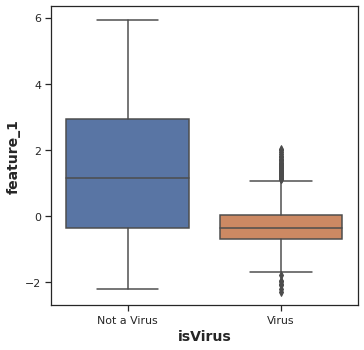

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'isVirus', y = 'feature_1', data = df)

plt.xlabel('isVirus', fontsize=14, fontweight='bold')
plt.ylabel('feature_1', fontsize=14, fontweight='bold')



Last Chart is about comparing feature_4 to rest of them.

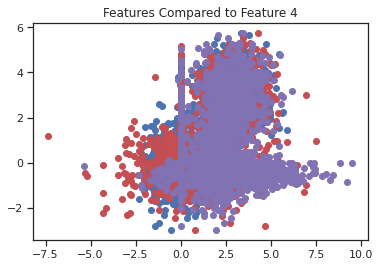

In [ ]:
import numpy as np

x1 = df['feature_1']
x2 = df['feature_2']
x3 = df['feature_3']
y1 = df['feature_4']

plt.scatter(x1, y1)
plt.scatter(x2, y1, color='r')
plt.scatter(x3, y1, color='m')
plt.title('Features Compared to Feature 4')
plt.show()



To be honest visualizing datas from here is my weak hand. The data that you gave is hard for me because of the column structure. I know and work on QuickSight but i try my best so hope you like it.

As I already said in my career plan, I have a lack of knowledge about Machine Learning. Last chapter of your last question is can not be done with what i know right now. As you can see from my CV I haven't any project/course that includes Machine Learning (I have a plan to work/study on it from udemy, coursera etc.). So here is my researchs about tensorflow and my last effort.

In [ ]:
import os
import tensorflow as tf

column_names = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'isVirus']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))


Features: ['feature_1', 'feature_2', 'feature_3', 'feature_4']
Label: isVirus


In [ ]:
class_names = ['Pozitif', 'Nötr', 'Negatif']


Can't create train_dataset and gave up because deadline was approaching :)

In [ ]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    df,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)




ValueError: ignored